In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
iqaluit ca
yerbogachen ru
iqaluit ca
vestmannaeyjar is
quelimane mz
belushya guba ru
sisophon kh
qaanaaq gl
beringovskiy ru
kodiak us
wucheng cn
arlit ne
sakakah sa
butaritari ki
dikson ru
taolanaro mg
torbay ca
hithadhoo mv
manoel urbano br
nuevitas cu
grindavik is
ushuaia ar
horn lake us
codrington ag
chuy uy
lasa cn
busselton au
fairbanks us
port-cartier ca
olga ru
puerto ayora ec
salalah om
taonan cn
los llanos de aridane es
lebu cl
springville us
rocha uy
busselton au
ushuaia ar
sarny ua
toliary mg
mataura pf
san carlos de bariloche ar
vardo no
hithadhoo mv
carora ve
vaini to
riyadh sa
atuona pf
klaksvik fo
atuona pf
marzuq ly
illoqqortoormiut gl
bethel us
husavik is
saskylakh ru
roald no
port hedland au
hermanus za
saldanha za
indian head ca
springbok za
kodiak us
arraial do cabo br
lebu cl
orlik ru
gambela et
lima pe
atuona pf
mataura pf
uribia co
gubkinskiy ru
ribeira grande pt
ayagoz kz
novorudnyy ru
hermanus za
hithadhoo mv
dunedin nz
skagastrond is
hermanus

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [16]:
import requests
requests.__version__

'2.26.0'

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | yerbogachen
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | quelimane
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | sisophon
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | beringovskiy
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | wucheng
Processing Record 12 of Set 1 | arlit
Processing Record 13 of Set 1 | sakakah
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | manoel urbano
Processing Record 20 of Set 1 | nuevitas
Processing Record 21 of Set 1 | grindavik
Processing

In [22]:
len(city_data)

570

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,65.52,49,1,1.01,MX,2022-03-22 13:15:53
1,Iqaluit,63.7506,-68.5145,-13.27,75,20,23.02,CA,2022-03-22 13:15:53
2,Yerbogachen,61.2767,108.0108,15.91,94,100,5.10,RU,2022-03-22 13:15:54
3,Vestmannaeyjar,63.4427,-20.2734,47.39,93,75,8.05,IS,2022-03-22 13:15:54
4,Quelimane,-17.8786,36.8883,82.35,74,75,6.91,MZ,2022-03-22 13:15:54
5,Sisophon,13.5859,102.9737,83.98,70,94,6.42,KH,2022-03-22 13:15:55
6,Qaanaaq,77.4840,-69.3632,-4.59,92,100,2.71,GL,2022-03-22 13:15:55
7,Beringovskiy,63.0500,179.3167,21.45,96,100,10.45,RU,2022-03-22 13:15:56
8,Kodiak,57.7900,-152.4072,33.31,60,0,16.11,US,2022-03-22 13:11:06
9,Wucheng,29.6008,118.1750,45.81,94,100,3.83,CN,2022-03-22 13:15:56


In [24]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]

In [26]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-03-22 13:15:53,22.8909,-109.9124,65.52,49,1,1.01
1,Iqaluit,CA,2022-03-22 13:15:53,63.7506,-68.5145,-13.27,75,20,23.02
2,Yerbogachen,RU,2022-03-22 13:15:54,61.2767,108.0108,15.91,94,100,5.10
3,Vestmannaeyjar,IS,2022-03-22 13:15:54,63.4427,-20.2734,47.39,93,75,8.05
4,Quelimane,MZ,2022-03-22 13:15:54,-17.8786,36.8883,82.35,74,75,6.91
...,...,...,...,...,...,...,...,...,...
565,Gigmoto,PH,2022-03-22 13:17:25,13.7796,124.3900,79.61,90,20,6.11
566,Odweyne,SO,2022-03-22 13:19:24,9.4092,45.0640,91.15,20,2,6.78
567,Escanaba,US,2022-03-22 13:19:25,45.7453,-87.0646,34.25,69,100,16.11
568,Ogaminana,NG,2022-03-22 13:19:25,7.5946,6.2248,106.39,20,66,1.77


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1647955894.2981384

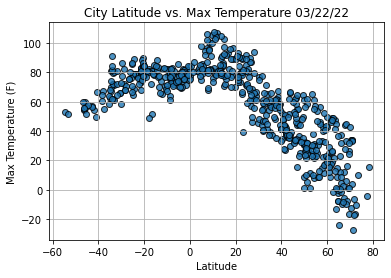

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

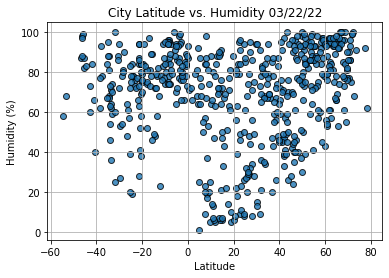

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

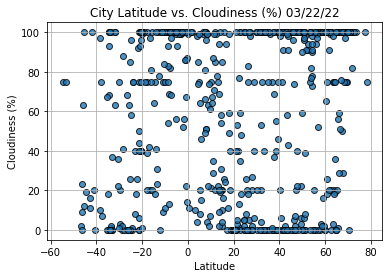

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

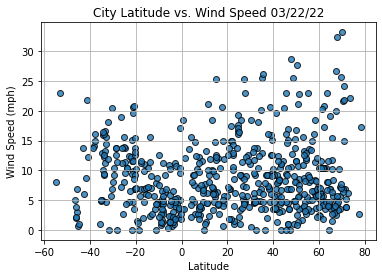

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [37]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2022-03-22 13:15:58
Lat                       73.5069
Lng                       80.5464
Max Temp                     9.95
Humidity                       91
Cloudiness                    100
Wind Speed                  22.08
Name: 13, dtype: object

In [38]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [39]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-03-22 13:15:53,22.8909,-109.9124,65.52,49,1,1.01
1,Iqaluit,CA,2022-03-22 13:15:53,63.7506,-68.5145,-13.27,75,20,23.02
2,Yerbogachen,RU,2022-03-22 13:15:54,61.2767,108.0108,15.91,94,100,5.10
3,Vestmannaeyjar,IS,2022-03-22 13:15:54,63.4427,-20.2734,47.39,93,75,8.05
5,Sisophon,KH,2022-03-22 13:15:55,13.5859,102.9737,83.98,70,94,6.42


In [40]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

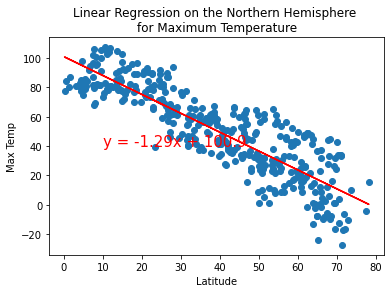

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

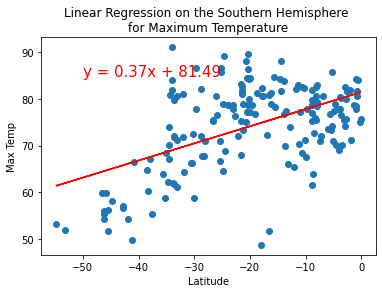

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

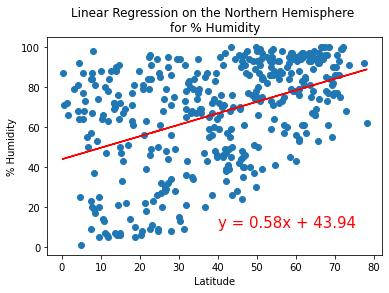

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

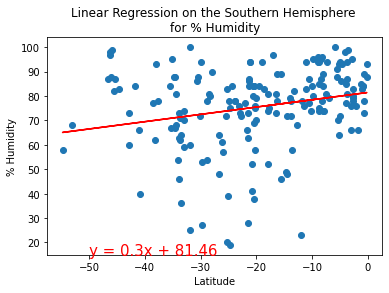

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

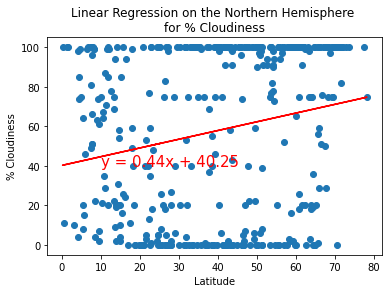

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

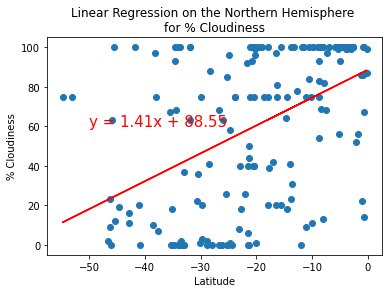

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

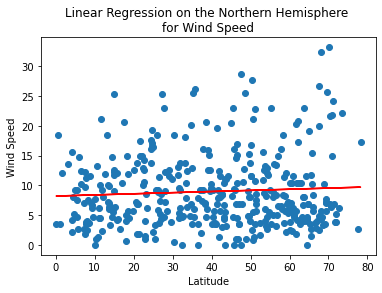

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

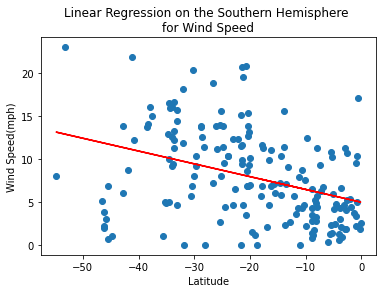

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [49]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lette\anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be SUP

In [50]:
pip install gmaps